In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [23]:
df = pd.read_csv("insurance.csv")

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


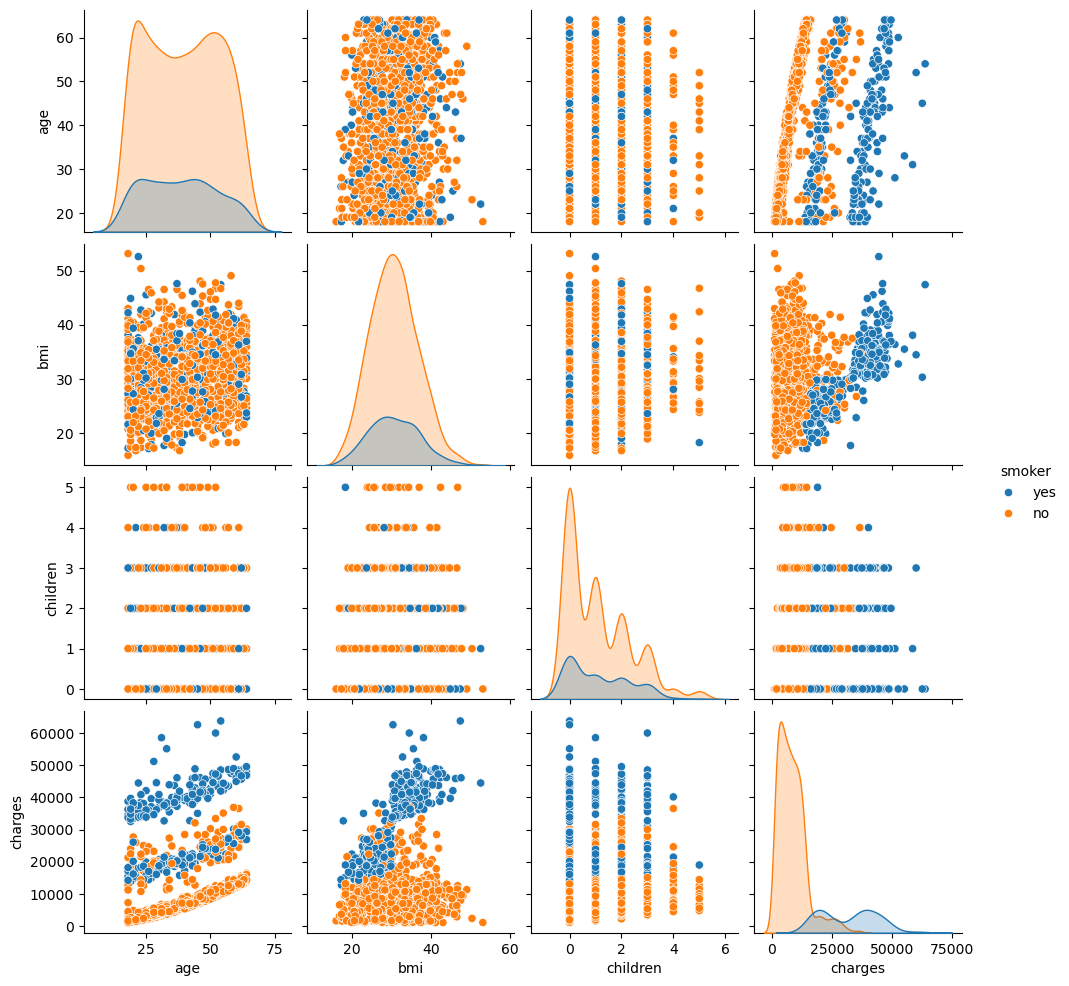

In [25]:
sns.pairplot(df, vars=["age", "bmi", "children", "charges"], hue="smoker")

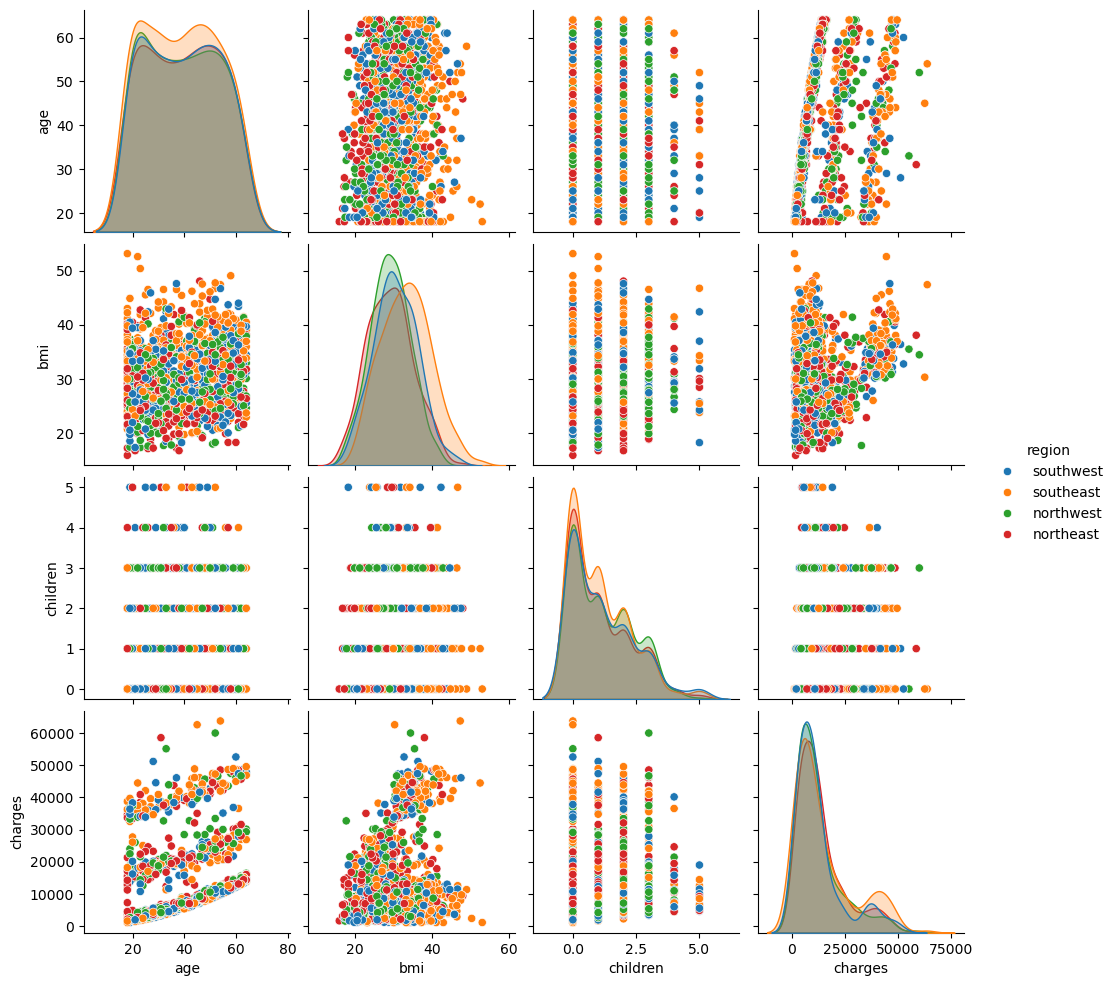

In [26]:
sns.pairplot(df, vars=["age", "bmi", "children", "charges"], hue="region")

In [30]:
###
# 1. The main idea here is to create different linear regression (OLS and regularized) models and use R^2 to explain the variance
# in the target variable. The best model will be the one with the highest R^2.
# 2. Also look at feature importance to see which features are most important in predicting the target variable.
# 3. Conduct a partial R^2 analysis to see how much each feature contributes to the overall R^2.
# 4. Fit an ANOVA type III SS model to cross verify.
# 5. Use SHAP values to explain the model predictions.
###

In [32]:
# For the Linear Regressions using sklearn, do the following:
# 1. Split the target variable from the features.
# 2. Isolate the categorical variables and OHE them.
# 3. Combine the OHE and the numerical variables.
# 4. Train, test split the data.
# 5. StandardScaler the test and train data.
# 6. Fit the model using cross_val_score.
# 7. Get the R^2 score.
# 8. Get the feature importance.
# 9. Get the partial R^2.

In [ ]:
y = df["charges"].to_numpy()

(1338,)

In [ ]:
# TODO: OHE creating too many columns. Need to fix this.
def get_features(df, cat_cols):
    cat_df = df[cat_cols]
    num_df = df.drop(columns=cat_cols).to_numpy()
    enc = OneHotEncoder()
    cat_df = enc.fit_transform(cat_df).toarray()
    return np.concatenate((num_df, cat_df), axis=1)

In [45]:
cat_cols = ["sex", "smoker", "region"]
features = df.drop(columns="charges")
X = get_features(features, cat_cols)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)

In [48]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [50]:
X_train.shape

(1070, 11)

In [57]:
model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, cv=5, scoring="r2")
print(f"R^2 scores: {scores}")
print(f"Mean R^2: {np.mean(scores)}")

R^2 scores: [0.75775109 0.70232462 0.74974594 0.78883945 0.73826168]
Mean R^2: 0.7473845545873117


In [58]:
model_fit = model.fit(X_train, y_train)

In [59]:
model_fit.coef_

array([ 3676.08649631,  2102.07204226,   678.39113394,    51.97912878,
         -51.97912878, -4841.21761702,  4841.21761702,   148.35089208,
         251.27266356,  -277.62045225,  -114.4897011 ])